In [1]:
from fastai.vision.all import *

In [2]:
class ToBinary(Transform):
    def encodes(self,x:PILMask)->Tensor: return torch.where(tensor(x)>0, 1, 0)
    def decodes(self,x:Tensor)->PILMask: return PILMask.create(np.array(torch.where(x==1, 255, 0)).astype('uint8'))

In [8]:
codes = ["Background", "Foreground"]

def get_mask(fn):
    f=Path(str(fn).replace('images', 'masks').lower())
    return PILMask.create(f) 

In [9]:
files = get_image_files(Path().absolute()/'data/segmentation/images')

In [10]:
splits = RandomSplitter(valid_pct=0.2)(files)
splits

((#1445) [1734,37,1514,1581,1404,1771,1293,246,920,494...],
 (#361) [282,1035,1769,463,1356,297,782,1649,680,388...])

In [16]:
AddMaskCodes??

Init signature: AddMaskCodes(self, codes=None)
Source:        
class AddMaskCodes(Transform):
    "Add the code metadata to a `TensorMask`"
    def __init__(self, codes=None):
        self.codes = codes
        if codes is not None: self.vocab,self.c = codes,len(codes)

    def decodes(self, o:TensorMask):
        if self.codes is not None: o.codes=self.codes
        return o
File:           ~/mambaforge/lib/python3.9/site-packages/fastai/vision/core.py
Type:           _TfmMeta
Subclasses:     


In [17]:
x_tfms = [PILImage.create,Resize((180,320),ResizeMethod.Squish)]
y_tfms = [get_mask, AddMaskCodes(codes=codes), ToBinary(),Resize((180,320),ResizeMethod.Squish),*aug_transforms(size=(180,320),min_scale=1),IntToFloatTensor]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)
x,y=dsets.valid[0]
x.shape,y.shape

RuntimeError: "check_uniform_bounds" not implemented for 'Long'

In [12]:
dls=dsets.dataloaders(bs=64, after_item=[Resize((180,320), ResizeMethod.Squish), ToTensor],
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

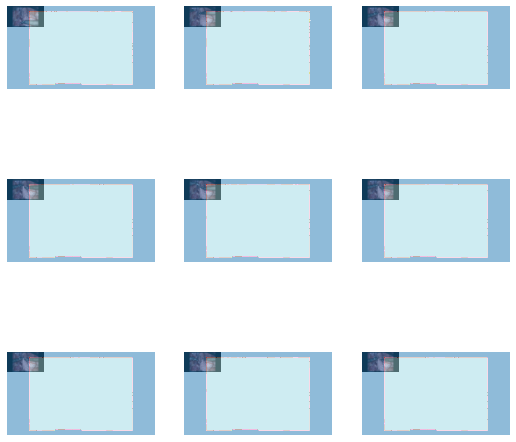

In [13]:
dls.show_batch()

In [ ]:
im_e=tfms(files[0])
assert isinstance(im_e, torch.Tensor), "Not torch tensor"
im_d=tfms.decode(im_e)
im_d

In [ ]:
im_e

In [ ]:
df = pd.DataFrame(t)
df.style.set_properties(**{'font-size':'6pt','max_colwidth':-1}).background_gradient('Greys')

In [ ]:
DataBlock??